In [1]:
import csv
import cv2

lines = []
with open('.\data\driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []

for line in lines:
    source_path = line[0]
    filename = source_path.split('IMG')[-1]
    current_path = '.\data\IMG' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

print('Loaded :', len(lines),'lines')





Loaded : 4783 lines


In [20]:
import csv
import cv2

lines = []
with open('.\data\driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
correction = 0.2
images_loaded = 0

for line in lines:
    source_path = line[0]
    filename = source_path.split('IMG')[-1]
    current_path = '.\data\IMG' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)
    images_loaded = images_loaded + 1
    
    source_path = line[1]
    filename = source_path.split('IMG')[-1]
    current_path = '.\data\IMG' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])+correction
    measurements.append(measurement)
    images_loaded = images_loaded + 1
    
    source_path = line[2]
    filename = source_path.split('IMG')[-1]
    current_path = '.\data\IMG' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])-correction
    measurements.append(measurement)
    images_loaded = images_loaded + 1
    
print('Images Loaded :', images_loaded)


Images Loaded : 14349


In [21]:
# Here we will flip the images and measurements from original data - As part of data augmentation.
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images,measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)
print("Data Augmentation Complete...")

Data Augmentation Complete...


In [22]:
# the image data is now is loaded into numpy array as this is the format KERAS require
import numpy as np
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)
print("Loading into Numpy Array Done...")

Loading into Numpy Array Done...


In [23]:
from keras.models import Sequential,Model
from keras.layers import Flatten,Dense,Lambda,Cropping2D
from keras.layers import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda((lambda x:(x/255.0) - 0.5),input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
#model.add(Convolution2D(6,5,5,activation='relu'))
#model.add(MaxPooling2D())
#model.add(Convolution2D(6,5,5,activation='relu'))
#model.add(MaxPooling2D())
model.add(Flatten())
#model.add(Dense(120))
#model.add(Dense(84))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
history_object=model.fit(X_train,y_train,validation_split=0.3,shuffle=True,nb_epoch=5)

model.save('model.h5')

Train on 20088 samples, validate on 8610 samples
Epoch 1/5
20088/20088 [==============================] - 344s - loss: 0.3499 - val_loss: 0.3401
Epoch 2/5
20088/20088 [==============================] - 87s - loss: 0.3419 - val_loss: 0.4053
Epoch 3/5
20088/20088 [==============================] - 98s - loss: 0.4239 - val_loss: 0.6768
Epoch 4/5
20088/20088 [==============================] - 56s - loss: 0.2862 - val_loss: 0.3945
Epoch 5/5
20088/20088 [==============================] - 44s - loss: 0.4681 - val_loss: 0.2477


dict_keys(['loss', 'val_loss'])


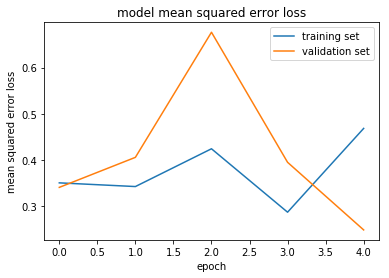

In [24]:
import matplotlib.pyplot as plt
### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()